### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [56]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

In [57]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [58]:
df = pd.DataFrame(lista_alumnos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21 non-null     object 
 1   1       21 non-null     int64  
 2   2       21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 636.0+ bytes


In [ ]:
df.columns = ['nombre', 'edad', 'altura'] #cambiar nombres de las columnas

<Axes: xlabel='edad', ylabel='altura'>

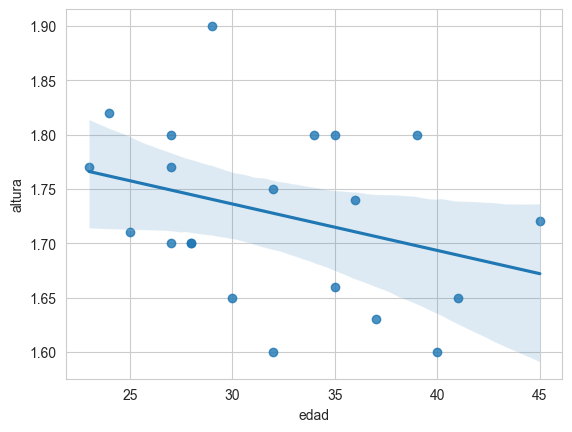

In [ ]:
sns.regplot(data = df, x="edad", y="altura") #print del scatter con la linea de regresion

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

In [61]:
df.corr(numeric_only=True)

,edad,altura
edad,1.000000,-0.329275
altura,-0.329275,1.000000


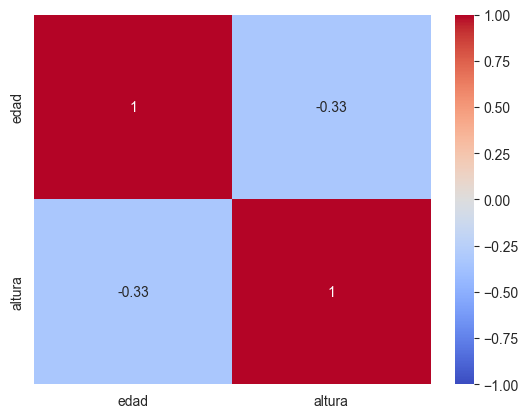

In [62]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin= -1, cmap = "coolwarm");

In [81]:
X = df[["edad"]] #ojo con las dimensiones. Hay que meter lista
y= df[["altura"]] 

In [82]:
print(y)

    altura
0     1.82
1     1.71
2     1.66
3     1.63
4     1.90
5     1.80
6     1.70
7     1.60
8     1.74
9     1.72
10    1.65
11    1.65
12    1.60
13    1.80
14    1.77
15    1.75
16    1.70
17    1.80
18    1.77
19    1.70
20    1.80


In [ ]:
from sklearn.model_selection import train_test_split #crear test y train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Entrena un modelo de regresión lineal

In [93]:
from sklearn.linear_model import LinearRegression

# Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener la línea de regresión
predicciones = modelo.predict(X_test)


In [94]:
print (predicciones)

[[1.75347826]
 [1.70990616]
 [1.71862058]
 [1.74912105]
 [1.70119174]]


### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

In [ ]:
from sklearn import metrics

modelo.score(X_test, y_test) #calcular score

-1.0398087196617292

In [ ]:
#calcular metricas
print('MAE:', metrics.mean_absolute_error(y_test, predicciones))
print('MSE:', metrics.mean_squared_error(y_test, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

MAE: 0.05318486080700664
MSE: 0.0033126493607306537
RMSE: 0.057555619714591326
